<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.751410,96.210054,168.411326,339.372790,174.638549,164.734241
1,0.0,1.0,84.432938,88.976210,-100.427488,82.981660,185.398198,-102.416537
2,0.0,2.0,84.611117,37.403454,-2.260502,129.754069,130.441975,-0.687906
3,0.0,3.0,54.155965,51.743598,-27.222860,88.676703,117.155671,-28.478968
4,0.0,4.0,83.151513,48.812995,31.218719,173.183228,141.265729,31.917499
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.189151,63.781460,-148.857435,0.113177,144.678315,-144.565139
59996,999.0,56.0,75.029682,96.606543,-35.418235,146.217990,168.047500,-21.829509
59997,999.0,57.0,97.291041,31.923620,-29.228777,109.985884,135.255800,-25.269916
59998,999.0,58.0,23.789434,51.621652,-71.864717,13.546370,104.935576,-91.389206


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.751410,96.210054,168.411326,339.372790,174.638549,164.734241
1,0.0,1.0,84.432938,88.976210,-100.427488,82.981660,185.398198,-102.416537
2,0.0,2.0,84.611117,37.403454,-2.260502,129.754069,130.441975,-0.687906
3,0.0,3.0,54.155965,51.743598,-27.222860,88.676703,117.155671,-28.478968
4,0.0,4.0,83.151513,48.812995,31.218719,173.183228,141.265729,31.917499
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.189151,63.781460,-148.857435,0.113177,144.678315,-144.565139
59996,999.0,56.0,75.029682,96.606543,-35.418235,146.217990,168.047500,-21.829509
59997,999.0,57.0,97.291041,31.923620,-29.228777,109.985884,135.255800,-25.269916
59998,999.0,58.0,23.789434,51.621652,-71.864717,13.546370,104.935576,-91.389206


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.751410  96.210054  168.411326  339.372790  174.638549   
      1.0    84.432938  88.976210 -100.427488   82.981660  185.398198   
      2.0    84.611117  37.403454   -2.260502  129.754069  130.441975   
      3.0    54.155965  51.743598  -27.222860   88.676703  117.155671   
      4.0    83.151513  48.812995   31.218719  173.183228  141.265729   
...                ...        ...         ...         ...         ...   
999.0 55.0   75.189151  63.781460 -148.857435    0.113177  144.678315   
      56.0   75.029682  96.606543  -35.418235  146.217990  168.047500   
      57.0   97.291041  31.923620  -29.228777  109.985884  135.255800   
      58.0   23.789434  51.621652  -71.864717   13.546370  104.935576   
      59.0   48.881275  89.024761 -104.769561   43.136475  146.831526   

                  e_hat  
rep   index              
0.0   0.0    164.734241  
      1.0   -102.416537  
      2.0     -0.687906  
      3.0    -28.478968  
      4.0     31.917499  
...                 ...  
999.0 55.0  -144.565139  
      56.0   -21.829509  
      57.0   -25.269916  
      58.0   -91.389206  
      59.0  -103.695050  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.751410  96.210054  168.411326  339.372790  174.638549   
      1.0    84.432938  88.976210 -100.427488   82.981660  185.398198   
      2.0    84.611117  37.403454   -2.260502  129.754069  130.441975   
      3.0    54.155965  51.743598  -27.222860   88.676703  117.155671   
      4.0    83.151513  48.812995   31.218719  173.183228  141.265729   
...                ...        ...         ...         ...         ...   
999.0 55.0   75.189151  63.781460 -148.857435    0.113177  144.678315   
      56.0   75.029682  96.606543  -35.418235  146.217990  168.047500   
      57.0   97.291041  31.923620  -29.228777  109.985884  135.255800   
      58.0   23.789434  51.621652  -71.864717   13.546370  104.935576   
      59.0   48.881275  89.024761 -104.769561   43.136475  146.831526   

                  e_hat  
rep   index              
0.0   0.0    164.734241  
      1.0   -102.416537  
      2.0     -0.687906  
      3.0    -28.478968  
      4.0     31.917499  
...                 ...  
999.0 55.0  -144.565139  
      56.0   -21.829509  
      57.0   -25.269916  
      58.0   -91.389206  
      59.0  -103.695050  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.751410,96.210054,168.411326,339.372790,174.638549,164.734241
1,0.0,1.0,84.432938,88.976210,-100.427488,82.981660,185.398198,-102.416537
2,0.0,2.0,84.611117,37.403454,-2.260502,129.754069,130.441975,-0.687906
3,0.0,3.0,54.155965,51.743598,-27.222860,88.676703,117.155671,-28.478968
4,0.0,4.0,83.151513,48.812995,31.218719,173.183228,141.265729,31.917499
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.189151,63.781460,-148.857435,0.113177,144.678315,-144.565139
59996,999.0,56.0,75.029682,96.606543,-35.418235,146.217990,168.047500,-21.829509
59997,999.0,57.0,97.291041,31.923620,-29.228777,109.985884,135.255800,-25.269916
59998,999.0,58.0,23.789434,51.621652,-71.864717,13.546370,104.935576,-91.389206


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.751410  96.210054  168.411326  339.372790  174.638549   
      1.0    84.432938  88.976210 -100.427488   82.981660  185.398198   
      2.0    84.611117  37.403454   -2.260502  129.754069  130.441975   
      3.0    54.155965  51.743598  -27.222860   88.676703  117.155671   
      4.0    83.151513  48.812995   31.218719  173.183228  141.265729   
...                ...        ...         ...         ...         ...   
999.0 55.0   75.189151  63.781460 -148.857435    0.113177  144.678315   
      56.0   75.029682  96.606543  -35.418235  146.217990  168.047500   
      57.0   97.291041  31.923620  -29.228777  109.985884  135.255800   
      58.0   23.789434  51.621652  -71.864717   13.546370  104.935576   
      59.0   48.881275  89.024761 -104.769561   43.136475  146.831526   

                  e_hat  
rep   index              
0.0   0.0    164.734241  
      1.0   -102.416537  
      2.0     -0.687906  
      3.0    -28.478968  
      4.0     31.917499  
...                 ...  
999.0 55.0  -144.565139  
      56.0   -21.829509  
      57.0   -25.269916  
      58.0   -91.389206  
      59.0  -103.695050  

[60000 rows x 6 columns]

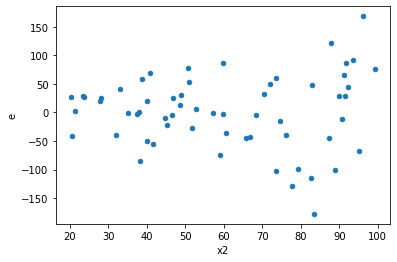

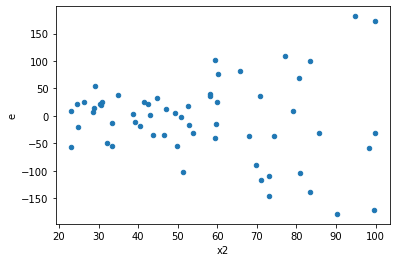

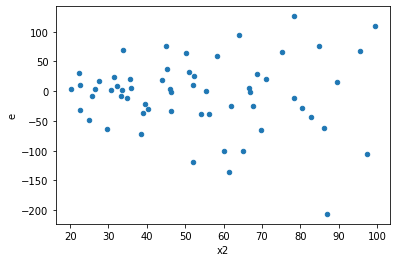

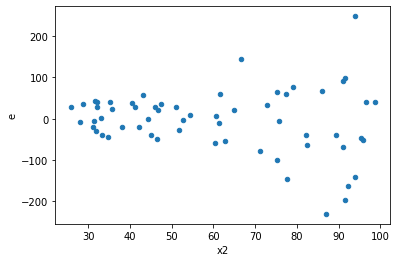

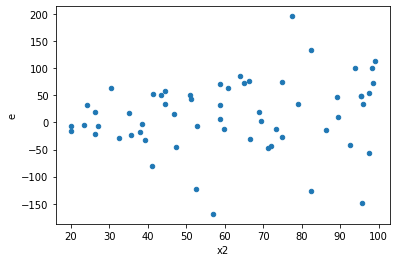

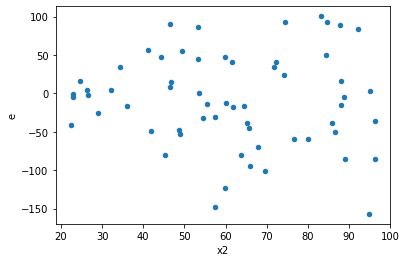

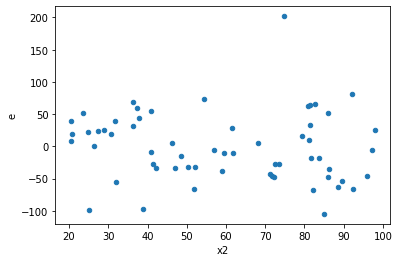

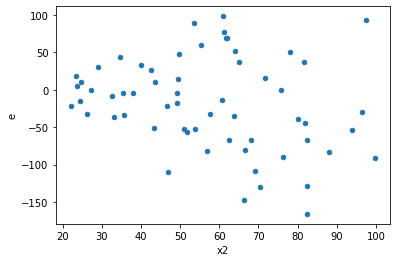

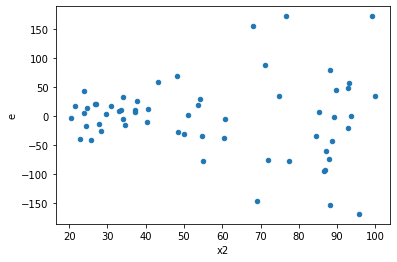

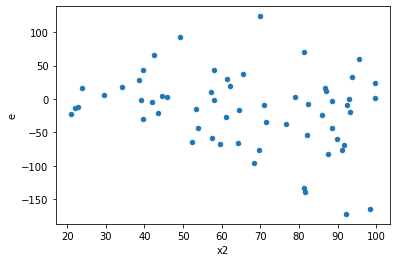

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,37091.82912476763,114629.86391859864,1685.9922329439833,5210.448359936302,3.0904343793079727,0.010705637427305348,0.9946471812863473,0.005352818713652674,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,64106.674125738085,114529.54585643769,2913.939732988095,5205.888448019895,1.7865463685076028,0.18143209319609754,0.9092839534019512,0.09071604659804877,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,40762.806646254525,106171.61741500234,1852.854847557024,4825.982609772834,2.6046199010871565,0.029270742736666744,0.9853646286316666,0.014635371368333372,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,65724.46592466295,200036.23587631792,2987.4757238483157,9092.556176196269,3.043558179774494,0.011762707774446657,0.9941186461127767,0.005881353887223328,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,56809.020582676996,139012.926559792,2582.2282083034997,6318.769389081454,2.4470220597709402,0.04113181775096586,0.9794340911245171,0.02056590887548293,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,66769.64746793853,82926.2159978916,3034.9839758153876,3769.3734544496183,1.2419747466498328,0.6156761941856828,0.6921619029071586,0.3078380970928414,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,43199.72508267369,58565.38410897463,1963.6238673942587,2662.062914044301,1.355688815076828,0.48126483699287403,0.759367581503563,0.24063241849643702,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,14497.260064224054,156737.2591652888,658.9663665556388,7124.42087114949,10.811509103853407,5.049488989161688e-07,0.9999997475255505,2.524744494580844e-07,Reject001=0 : Heteroscedasticity
9.0,22.0,22.0,34956.094186552524,89849.27886362959,1588.9133721160238,4084.0581301649813,2.5703466292350896,0.031500796564492894,0.9842496017177536,0.015750398282246447,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,37091.82912476763,114629.86391859864,1685.9922329439833,5210.448359936302,3.0904343793079727,0.010705637427305348,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,64106.674125738085,114529.54585643769,2913.939732988095,5205.888448019895,1.7865463685076028,0.18143209319609754,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,40762.806646254525,106171.61741500234,1852.854847557024,4825.982609772834,2.6046199010871565,0.029270742736666744,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,65724.46592466295,200036.23587631792,2987.4757238483157,9092.556176196269,3.043558179774494,0.011762707774446657,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,56809.020582676996,139012.926559792,2582.2282083034997,6318.769389081454,2.4470220597709402,0.04113181775096586,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,66769.64746793853,82926.2159978916,3034.9839758153876,3769.3734544496183,1.2419747466498328,0.6156761941856828,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,43199.72508267369,58565.38410897463,1963.6238673942587,2662.062914044301,1.355688815076828,0.48126483699287403,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,116519.58648391241,45768.18021837357,5296.344840177837,2080.3718281078895,0.3927938778317985,0.03320344614898049,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,14497.260064224054,156737.2591652888,658.9663665556388,7124.42087114949,10.811509103853407,5.049488989161688e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      583
Reject001=0 : Heteroscedasticity    417
Name: Result_test, dtype: int64